# Computational Methods in Ordinary Differential Equations

*Dr Jon Shiach, Department of Computing and Mathematics, Manchester Metropolitan University*

---
#### Learning outcomes

On successful completion of this page readers will be able to:

- Identity an [initial value problem](#Initial-Value-Problems);
- Derive the [Euler method](#The-Euler-method) and apply it to solve first-order ordinary differential equations;
- Express a [higher-order ODE as a system of first-order ODEs](#Solving-higher-order-ordinary-differential-equations);
- Apply an ODE solver to solve a [system of ODEs](#Solving-Systems-of-Ordinary-Differential-Equations).

# Initial Value Problems

An [**Initial Value Problem**](https://en.wikipedia.org/wiki/Initial_value_problem) (IVP) is written as an [Ordinary Differential Equation](https://en.wikipedia.org/wiki/Ordinary_dif) (ODE) where the initial solution at the lower boundary of the domain is known. For example,

\begin{align*}
    y' &= f(t, y), & t &\in [t_{\min}, t_{\max}], & y(t_{\min}) &= y_0.
\end{align*}

Here a first-order ODE $y'=f(t,y)$ is defined over the domain $t\in [t_{\min}, t_{\max}]$ and the initial solution $y(t_{\min})$ is the known value $y_0$. 

In most real world practical applications, IVPs cannot be solved using analytical methods so instead we use computational methods called **ODE solvers** to approximate the solutions. The simplest ODE solver is the Euler method.

## The Euler method
The [**Euler method**](https://en.wikipedia.org/wiki/Euler_method) for solving the first-order Ordinary Differential Equation (ODE) can be derived very easily by truncating the [Taylor series](https://en.wikipedia.org/wiki/Taylor_series) after the first-order term

\begin{equation}
    y_{n+1} = y_n + hf(t_n, y_n),
\end{equation}

where the subscript notation used is $y_{n+1} = y(t + h)$, $y_n = y(t_n)$.

To apply the Euler method to solve an IVP we loop through the domain and calculate the values of $y_{n+1}$ using the Euler method with the known values $t_{n}$ and $y_n$. 

The code below defines a function `euler` that solves an IVP where `tspan` is a two element array containing the lower and upper bounds of the $t$ domain, `y0` is the value of $y$ at the lower bound and `h` is the step length.

#### Example 1

Calculate the first two steps of the Euler method when used to solve the following IVP

$$ y' = \sin^2(t)y, \qquad t \in [0, 5], \qquad y(0) = 1,$$

using a step length $h=0.5$.

Since we have $t_0=0$ and $y_0=1$ then

\begin{align*}
    y_1 &= y_0 + h \sin^2(t_0)y_0 = 1 + 0.5\sin^2(0)(1) = 1, & t_1 &= t_0 + h = 0 + 0.5 = 0.5,\\
    y_2 &= y_1 + h \sin^2(t_1)y_1 = 1 + 0.5\sin^2(0.5)(1) = 1.1149, & t_2 &= t_1 + h = 0.5 + 0.5 = 1.0.
\end{align*}

#### Example 2

Calculate the solution of the IVP from [example 1](#Example-1) over the whole domain $t\in [0,5]$ using the Euler method with a step length of $h=0.5$ and compare it to the exact solution given by

$$y = e^{\frac{1}{2}(t - \sin(t)\cos(t))}$$

The functions below defines the right-hand side of the ODE and the exact solution to the IVP.

In [1]:
import numpy as np

def f(t, y):
    return np.sin(t)**2 * y

def exact_sol(t):
    return np.exp(0.5 * (t - np.sin(t) * np.cos(t)))

The code below defines a function called `euler` that solves an IVP using the Euler method. The input arguments are `f` is the name of the funcion the defines the ODE, `tspan` is a two-element array containing the lower and upper bounds of the $t$ domain, `y0` is the initial value of $y$ at the lower bound and `h` is the step length.
<a id="euler"></a>

In [2]:
def euler(f, tspan, y0, h):
    '''
    Calculuates the solution to an IVP using the Euler method
    '''

    # Initialise solution arrays
    nsteps = int((tspan[1] - tspan[0]) / h)
    t = np.zeros(nsteps + 1)
    y = np.zeros(nsteps + 1)
    t[0] = tspan[0]
    y[0] = y0

    # Solver loop
    for n in range(nsteps):
        y[n + 1] = y[n] + h * f(t[n], y[n])
        t[n + 1] = t[n] + h

    return t, y

The program below invokes the Euler method to solve this IVP.

 t  Euler   Exact 
--- ------ -------
0.0 1.0000  1.0000
0.5 1.0000  1.0404
1.0 1.1149  1.3135
1.5 1.5096  2.0436
2.0 2.2607  3.2845
2.5 3.1953  4.4359
3.0 3.7675  4.8059
3.5 3.8050  4.8830
4.0 4.0391  5.7699
4.5 5.1958  8.5589
5.0 7.6783 13.9573


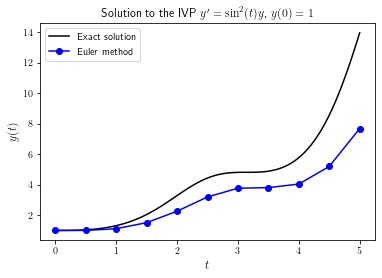

In [3]:
import numpy as np
from astropy.table import Table
import matplotlib.pyplot as plt
from matplotlib import rc
%matplotlib inline
rc('text', usetex=True)

# Define IVP parameters
tspan = [0, 5]
y0 = 1
h = 0.5

# Invoke the Euler method to solve IVP
t, y = euler(f, tspan, y0, h)

# Output solution table
table = Table([t, y, exact_sol(t)], names=('t', 'Euler', 'Exact'))
table['Euler'].info.format = '0.4f'
table['Exact'].info.format = '0.4f'
print(table)

# Plot numerical and exact solutions
fig, ax = plt.subplots()

t1 = np.linspace(tspan[0], tspan[1], 100)
ax.plot(t1, exact_sol(t1), 'k-', label='Exact solution')
ax.plot(t, y, 'bo-', label='Euler method')

ax.set_title("Solution to the IVP $y'=\sin^2(t)y$, $y(0) = 1$")
ax.set_xlabel('$t$', fontsize=12)
ax.set_ylabel('$y(t)$', fontsize=12)
ax.legend()

plt.show()

Here we can see that the solution using the Euler method deviates from the exact solution. This is because the Euler method is a first-order method and the truncation errors at each step accumulate as we step through the solution. One way to improve our solution is to use a smaller step length.


#### Example 3
Repeat the solution of the IVP in [example 2](#Example-2) using a step length of $h=0.1$.

 t   Euler   Exact 
--- ------- -------
0.0  1.0000  1.0000
0.1  1.0000  1.0003
0.2  1.0010  1.0026
0.3  1.0049  1.0089
0.4  1.0137  1.0209
0.5  1.0291  1.0404
0.6  1.0528  1.0693
0.7  1.0863  1.1092
0.8  1.1314  1.1620
0.9  1.1896  1.2294
...     ...     ...
4.0  5.2940  5.7699
4.1  5.5972  6.1400
4.2  5.9720  6.5953
4.3  6.4256  7.1449
4.4  6.9650  7.7972
4.5  7.5957  8.5589
4.6  8.3215  9.4336
4.7  9.1432 10.4208
4.8 10.0574 11.5142
4.9 11.0554 12.7002
5.0 12.1225 13.9573
Length = 51 rows


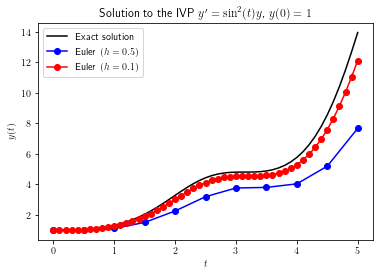

In [4]:
# Invoke the Euler method to solve IVP using a step length of h = 0.1
t1, y1 = euler(f, tspan, y0, 0.5)
t2, y2 = euler(f, tspan, y0, 0.1)

# Output solution table
table = Table([t2, y2, exact_sol(t2)], names=('t', 'Euler', 'Exact'))
table['t'].info.format = '0.1f'
table['Euler'].info.format = '0.4f'
table['Exact'].info.format = '0.4f'
print(table)

# Plot numerical and exact solutions
fig, ax = plt.subplots()

ax.plot(t2, exact_sol(t2), 'k-', label='Exact solution')
ax.plot(t1, y1, 'bo-', label='Euler $(h=0.5)$')
ax.plot(t2, y2, 'ro-', label='Euler $(h=0.1)$')

ax.set_title("Solution to the IVP $y'=\sin^2(t)y$, $y(0) = 1$")
ax.set_xlabel('$t$')
ax.set_ylabel('$y(t)$')
ax.legend()

plt.show()

Here we can see that although using a smaller step length has increased the accuracy of the solution it still doesnt match the exact solution. The Euler method is easy to derive and apply but is not very accurate. 

The derivation of more accurate methods is covered in [Runge-Kutta methods](runge_kutta_methods.ipynb).

---
## Solving higher-order ordinary differential equations

The numerical methods that are applied to calculate the solutions to ODEs can only be applied to first-order ODEs. To apply them to higher-order ODEs we first need to rewrite them as a system of first-order ODEs.

Consider the $N$th-order ODE 

$$y^{(N)} = f(t, y, y', y'', \ldots, y^{(N-1)}).$$

If we let $y_1=y$, $y_2 = y'$, $y_3 = y''$ and so on up to $y_N = y^{(N-1)}$ then we have

\begin{align*}
    y_1' &= y_2, \\
    y_2' &= y_3, \\
    & \vdots \\
    y_N' &= f(t, y_1, y_2, y_3, \ldots , y_N).
\end{align*}

This is a system of $N$ first-order ODEs. We can apply our numerical methods for solving ODEs to each equation in the system to give an equivalent solution to the $n$th-order ODE.

#### Example 4

Rewrite the following third-order ODE as a system of three first-order ODEs.

$$ y''' + yy'' - 2y' + tyy'' - 10 = 0$$

Let $y_1 = y$, $y_2 = y'$, $y_3 = y''$ then we can rewrite this ODE using

\begin{align*}
    y_1' &= y_2, \\
    y_2' &= y_3, \\
    y_3' &= -y_1y_3 + 2y_2 - ty_1y_2 + 10.
\end{align*}

### Solving Systems of Ordinary Differential Equations

A system of $N$ first-order ODEs is written in the form

\begin{align*}
    y_1' &= f_1(t, y_1), \\
    y_2' &= f_2(t, y_2), \\
    & \vdots \\
    y_N' &= f_N(t, y_N).
\end{align*}

Let $\mathbf{y} = \pmatrix{y_1 \\ y_2 \\ \vdots \\ y_N}$ and $F(t, \mathbf{y}) = \pmatrix{f_1(t, y_1) \\ f_2(t, y_2) \\ \vdots \\ f_N(t, y_N)}$ then we can write the system in vector form

$$\mathbf{y}' = F(t, \mathbf{y}).$$

Therefore Euler method for solving this ODE in vector form is

$$ \mathbf{y}_{n+1} = \mathbf{y}_n + hF(t, \mathbf{y}).$$



#### Example 5

Calculate two steps of the Euler method used to solve the IVP

\begin{align*}
    y'' + y &= 0, & t &\in[0, 10], & y(0) &= 2, & y'(0) = 0.
\end{align*}

using a step length of $h=0.1$.

First we need to rewrite the second-order ODE as two first-order ODEs. Let $y_1=y$ and $y_2=y'$ then

\begin{align*}
    y_1' &= y_2, & y_1(0) = 2,\\
    y_2' &= -y_1, & y_2(0) = 0,
\end{align*}

and we have

\begin{align*}
    \mathbf{y} &= \pmatrix{y_1 \\ y_2}, &
    F(t, \mathbf{y}) &= \pmatrix{ y_2 \\ -y_1}.
\end{align*}

Calculating the first two steps of the Euler method:

\begin{align*}
    \mathbf{y}_1 &= \mathbf{y}_0 + hF(t_0, \mathbf{y}_0)
    = \pmatrix{2 \\ 0} + 0.1 \pmatrix{ 0 \\ -2 }
    = \pmatrix{2 \\ -0.2}, \\
    \mathbf{y}_2 &= \mathbf{y}_1 + hF(t_1, \mathbf{y}_1) 
    = \pmatrix{2 \\ -0.2} + 0.1 \pmatrix{-0.2 \\ -2} 
    = \pmatrix{1.98 \\ -0.4}.
\end{align*}

#### Example 6

Calculate the solution of the IVP from [example 5](#Example-1) over the whole domain $t\in [0,10]$ using the Euler method with a step length of $h=0.1$ and compare it to the exact solution given by

$$y = 2\cos(t)$$

The functions below defines the right-hand side of the ODE and the exact solution to the IVP.

In [5]:
import numpy as np

def f(t, y):
    dy = np.zeros(y.shape)
    dy[0] = y[1]
    dy[1] = -y[0]
    return dy

def exact_sol(t):
    return 2 * np.cos(t)

The code below defines a function called `euler2` that solves an IVP defined using a system of ODEs. This is very similar to the [`euler`](#euler) function defined earlier with the exeption that the `y` array as $N$ columns.

In [6]:
def euler2(f, tspan, y0, h):
    '''
    This function calculates the solution to an IVP expressed using a system
    of ODEs using the Euler method
    '''

    # Initialise solution arrays
    nsteps = int((tspan[1] - tspan[0]) / h)
    t = np.zeros(nsteps + 1)
    y = np.zeros((nsteps + 1, len(y0)))
    t[0] = tspan[0]
    y[0, :] = y0

    # Solver loop
    for n in range(nsteps):
        y[n + 1, :] = y[n, :] + h * f(t[n], y[n, :])
        t[n + 1] = t[n] + h

    return t, y

The program below invokes the Euler method to solve this IVP.

 t    Euler   Exact 
---- ------- -------
 0.0  2.0000  2.0000
 0.1  2.0000  1.9900
 0.2  1.9800  1.9601
 0.3  1.9400  1.9107
 0.4  1.8802  1.8421
 0.5  1.8010  1.7552
 0.6  1.7030  1.6507
 0.7  1.5870  1.5297
 0.8  1.4539  1.3934
 0.9  1.3050  1.2432
 ...     ...     ...
 9.0 -2.8118 -1.8223
 9.1 -2.9492 -1.8954
 9.2 -3.0585 -1.9497
 9.3 -3.1383 -1.9845
 9.4 -3.1875 -1.9994
 9.5 -3.2054 -1.9943
 9.6 -3.1913 -1.9694
 9.7 -3.1453 -1.9247
 9.8 -3.0673 -1.8609
 9.9 -2.9578 -1.7784
10.0 -2.8177 -1.6781
Length = 101 rows


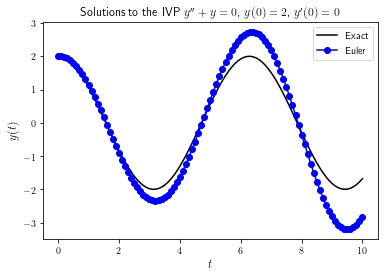

In [7]:
import numpy as np
from astropy.table import Table
import matplotlib.pyplot as plt
from matplotlib import rc
rc('text', usetex=True)
%matplotlib inline

# Define IVP parameters
tspan = [0, 10]
y0 = [2, 0]
h = 0.1

# Solve IVP using the Euler method
t, y = euler2(f, tspan, y0, h)

# Output solution table
table = Table([t, y[:,0], exact_sol(t)], names=('t', 'Euler', 'Exact'))
table['t'].info.format = '0.1f'
table['Euler'].info.format = '0.4f'
table['Exact'].info.format = '0.4f'
print(table)

# Plot solution
fig, ax = plt.subplots()

ax.plot(t, exact_sol(t), 'k-', label='Exact')
ax.plot(t, y[:,0], 'bo-', label='Euler')
ax.set_title("Solutions to the IVP $y''+y=0$, $y(0)=2$, $y'(0)=0$")
ax.set_xlabel('$t$', fontsize=12)
ax.set_ylabel('$y(t)$', fontsize=12)
ax.legend()

plt.show()

Here we can see that the Euler method solution is deviating away from the exact solution. Once again this is a result of the lower order accuracy of the Euler method.

---
## Summary

- An [initial value problem](#Initial-Value-Problems) is expressed as an ODE where the solution at the lower bound of the domain is known.
- The [Euler method](#The-Euler-method) is derived by truncating the Taylor series after the first-order term. It advances the solution over a small step of length $h$ using known values of $t_n$ and $y_n$ to calculate $y_{n+1}=y(t_n + h)$.
- The Euler method is only first-order accurate so the solutions tend to be inaccurate unless using a very small value of $h$.
- [Higher-order ODEs](#Solving-higher-order-ordinary-differential-equations) can be rewritten as systems of first-order ODEs which can be solved using numerical solvers.

Next: [Runge-Kutta Methods](runge_kutta_methods.ipynb)